# 확률적 경사하강법 (stochastic gradient descent)
- 실서비스는 지속적으로 요구사항이 변화하고 주어지는 인풋도 변화한다. 변화하는 데이터들에 대해 학습을 하기 위해서는 점진적인 학습이 필요하다. 지금까지 했던 모델은 기존에 학습했던 내역을 버리고 전부 다시 학습하는 방법으로 진행된다. 이를 해결하기 위해 **점진적 학습**을 사용한다. 확률적 경사하강법은 대표적인 점진적 학습중 하나이다.

- 1개씩 랜덤으로 꺼내서 조금씩 경사를 조절하는것

### 에포크
- 확률적 경사하강법에서 훈련세트를 모두 소진한 과정의 단위
  - 100개의 데이터를 10에포크 학습했다. -> 100*10번 데이터를 학습함


### 다른 경사하강법 종류

- 미니배치 경사하강법
  - N개씩 꺼내서 경사 조금씩 조절
- 배치 경사하강법
  - 전부 꺼내서 경사 조금씩 조절

### 손실함수
- 나의 머신러닝 모델의 예측이 실제값과 얼마나 차이가 나는지 측정하는 기준
- 손실함수의 결과로 경사 하강법의 경사를 조절한다. -> 손실함수를 정확도로 사용
  - 이를 위해서는 정확도값이 연속적이여야한다.   
  - 손실함수는 미분이 가능해야한다.
  - 손실함수의 종류에 따라 경사를 조절하는 양이 다르다. -> 성능에 영향을 끼친다.

#### logistic loss function ( = binary cross-entropy  loss function)
- 예측값이 높으면 낮은손실이 되고, 낮으면 높은손실이 된다.
- 다중분류를 위해서는 cross-entropy loss function 를 사용한다.
- 손실함수는 이미 라이브러리에서 제공해주기때문에 직접 구현할 필요는 없다.

In [10]:
# 경사하강법을 사용하는 모델중하나인 SGDClassifier
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
# 물고기들의 데이터로 물고기의 종류를 맞춰보자

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fish_input, fish_target, random_state=42)

print(X_train[0])

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)
print('데이터 표준화 전처리 ')
print(train_scaled[0])

[720.      35.      40.6     16.3618   6.09  ]
데이터 표준화 전처리 
[0.91965782 0.60943175 0.81041221 1.85194896 1.00075672]


In [14]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)
sc.fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))
print('정확도가 낮으므로 1에포크 더 실행한다.')
sc.partial_fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.773109243697479
0.775
정확도가 낮으므로 1에포크 더 실행한다.
0.8151260504201681
0.825


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


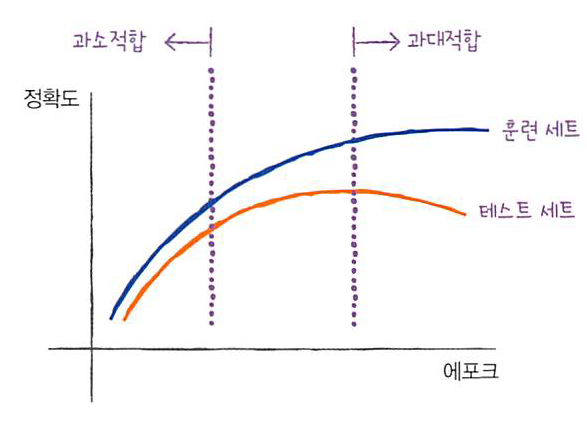
### 에포크
- 데이터세트를 모두 순회한 횟수를 일컫는 단위? 
- 에포크가 높을수록 데이터를 여러번 학습하기 때문에 정확도가 올라간다. 하지만 과도한 학습은 훈련세트에 과도하게 fitting되어 역효과를 낸다. (overfitting)
- 여러 에포크를 학습하는 경사하강법에서는 적절한 fitting값에서 학습을 멈추는 early stopping을 제공하기도한다.

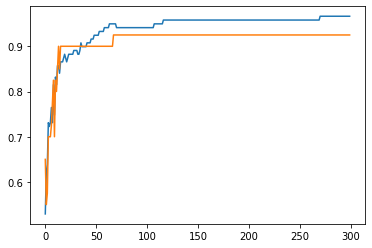

100회의 경우가 두 데이터셋의 정확도가 비슷하다. 
 그리고 그 이후에는 테스트셋의 정확도는 유지되고 훈련셋의 정확도만 상승하게되어 
 오버피팅이 발생한다.


In [32]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(y_train)

for _ in range(0,300): 
  sc.partial_fit(train_scaled, y_train, classes=classes)
  train_score.append(sc.score(train_scaled, y_train))
  test_score.append(sc.score(test_scaled, y_test))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()
print('100회의 경우가 두 데이터셋의 정확도가 비슷하다. \n 그리고 그 이후에는 테스트셋의 정확도는 유지되고 훈련셋의 정확도만 상승하게되어 \n 오버피팅이 발생한다.')

In [23]:
from sklearn.linear_model import SGDClassifier
# SGDClassifier는 일정 에포크횟수동안 성능이 증가하지 않으면 학습을 그만둔다.
# tol=None옵션으로 해당 옵션을 껏다.
sc = SGDClassifier(loss="log", max_iter=100, random_state=42, tol=None)
sc.fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))
print('100회시에 적절한 학습이 이루어진다.')

0.957983193277311
0.925


- 과거 농경사회에서 노인을 우대한 이유가 노인의 경험이 사실상 경사하강법으로 학습된 지식이여서 우대한게 아닐까? 날씨, 강수량, 거름 등 파라미터에 따른 흉년과 풍년(타겟값)을 어느정도 알고있으니 말이다.
